In [24]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd 
import gmaps
import requests
import gmaps
import os
import json
from config import g_key

In [25]:
csv = "fire_clean.csv"
fires_pd = pd.read_csv("fire_clean.csv")
fires_pd.head(100)

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
95,97,FS-FIRESTAT,Humboldt-Toiyabe National Forest,2005,Debris Burning,0.10,A,38.700278,-119.840556,CA
96,98,FS-FIRESTAT,Humboldt-Toiyabe National Forest,2005,Arson,0.01,A,38.453611,-119.458611,CA
97,99,FS-FIRESTAT,Carson National Forest,2005,Lightning,0.10,A,36.669444,-107.253611,NM
98,100,FS-FIRESTAT,Carson National Forest,2005,Lightning,0.25,A,36.876389,-107.219167,NM


In [26]:
average_size = fires_pd.groupby(fires_pd["FIRE_YEAR"]).mean()["FIRE_SIZE"]
years = pd.DataFrame({
    "Average Size of Fire":average_size
})
years

,Average Size of Fire
FIRE_YEAR,
1992,32.364222
1993,35.356208
1994,54.198875
1995,28.676755
1996,79.460604
1997,52.313024
1998,29.414983
1999,68.039342
2000,79.234760


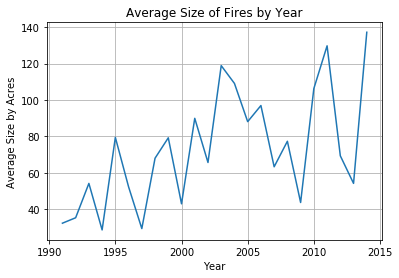

In [27]:
x_axis = np.arange(1991,2015,1)
y_axis = years
plt.plot(x_axis, y_axis) 
plt.title("Average Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Average Size by Acres")
plt.grid()
plt.savefig("output_data_sam/line_chart_average_size_of_fires.png")
plt.show()

In [28]:
total_size = (round(fires_pd.groupby(fires_pd["FIRE_YEAR"]).sum()["FIRE_SIZE"],2)) / 1000000
size_years = pd.DataFrame({
    "Total Size of Fire":total_size
})
size_years

,Total Size of Fire
FIRE_YEAR,
1992,2.199958
1993,2.191696
1994,4.116676
1995,2.049585
1996,6.005156
1997,3.214635
1998,2.011102
1999,6.080200
2000,7.639499


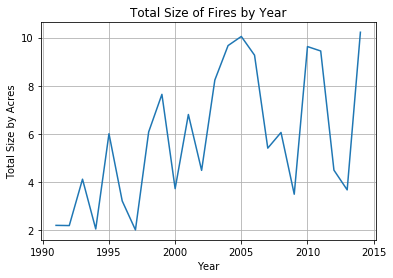

In [29]:
x_axis_2 = np.arange(1991,2015,1)
y_axis_2 = size_years
plt.plot(x_axis_2, y_axis_2) 
plt.title("Total Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Total Size by Acres")
plt.grid()
plt.savefig("output_data_sam/line_chart_total_size_of_fires.png")
plt.show()

In [30]:
state = fires_pd["STATE"]
cause = fires_pd["STAT_CAUSE_DESCR"]
causing_fire = cause.value_counts()
causing_fire

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

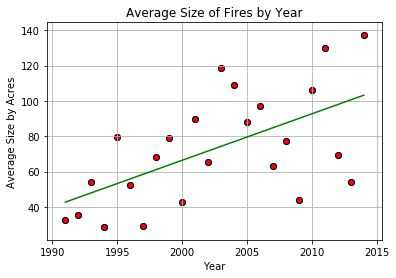

The r-squared is: 0.5874207511728418


In [31]:
x_values = np.arange(1991,2015,1)
y_values = average_size
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black") 
plt.title("Average Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Average Size by Acres")
plt.grid()
plt.savefig("output_data_sam/average_fire_size_by_year.png")
plt.show()
print(f"The r-squared is: {rvalue}")

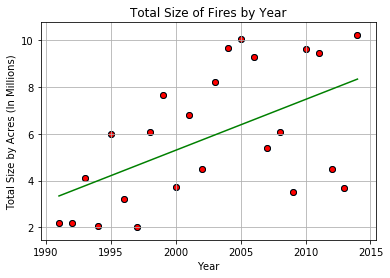

The r-squared is: 0.542743540189615


In [32]:
x_values_2 = np.arange(1991,2015,1)
y_values_2 = total_size
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_2,y_values_2)
plt.plot(x_values_2,regress_values_2,"g")
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="red", edgecolors="black") 
plt.title("Total Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Total Size by Acres (In Millions)")
plt.grid()
plt.savefig("output_data_sam/fire_size_by_year.png")
plt.show()
print(f"The r-squared is: {rvalue}")

In [42]:
latitude = fires_pd["LATITUDE"]
longitude = fires_pd["LONGITUDE"].map(str)
states_coordinate = fires_pd["STATE"]
fire_size_coordinate = fires_pd["FIRE_SIZE"]
fire_year_coord = fires_pd["FIRE_YEAR"]
coordinates_df = pd.DataFrame({
    "Latitude":latitude,
    "Longitude":longitude,
    "State":states_coordinate,
    "Fire Size by Acres":fire_size_coordinate,
    "Year of Fire":fire_year_coord
}
)
big_fires = coordinates_df["Fire Size by Acres"] > 15000
fire_heat = coordinates_df[big_fires]
fire_heat.head()

,Latitude,Longitude,State,Fire Size by Acres,Year of Fire
16,38.523333,-120.21166667,CA,16823.0,2004
188,33.723333,-111.275,AZ,16100.0,2005
3867,46.234444,-117.68055556,WA,52000.0,2005
4157,45.090556,-114.70361111,ID,20400.0,2005
4820,31.422778,-111.33,AZ,23183.0,2005


In [43]:
gmaps.configure(api_key=g_key)

In [44]:
coordinates = fire_heat[["Latitude", "Longitude"]].astype(float)
fire_size_coordinates = fire_heat["Fire Size by Acres"].astype(float)
figure_layout = {
     'width' : '1000px',
     'height':'400px',
     'border':'1px solid black',
     'padding':'1px',
     'margin':'0 auto 0 auto'
}

fig = gmaps.figure()
heatmaps = gmaps.heatmap_layer(coordinates, weights=fire_size_coordinates,
                                   dissipating=False, max_intensity=2,
                                   point_radius=.2)
fig.add_layer(heatmaps)
fig

Figure(layout=FigureLayout(height='420px'))

In [83]:
fire_year_bar = fire_heat.groupby(fire_heat["Year of Fire"]).count()["Fire Size by Acres"]
fire_year_bar = pd.DataFrame(fire_year_bar).reset_index()

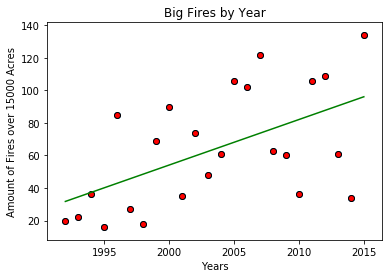

The r-squared is: 0.5518056212965203


In [119]:
x_values_3 = fire_year_bar["Year of Fire"]
y_values_3 = fire_year_bar["Fire Size by Acres"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_3, y_values_3)
regress_values_3 = x_values_3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_3,y_values_3)
plt.plot(x_values_3,regress_values_3,"g")
plt.scatter(x_values_3,y_values_3 , marker="o", facecolors="red", edgecolors="black")
plt.title("Big Fires by Year")
plt.xlabel("Years")
plt.ylabel("Amount of Fires over 15000 Acres")
plt.savefig("output_data_sam/year_of_big_fires.png")
plt.show()
print(f"The r-squared is: {rvalue}")

In [36]:
fire_causes = fires_pd["STAT_CAUSE_DESCR"]
causes_df = pd.DataFrame({
    "Latitude":latitude,
    "Longitude":longitude,
    "State":states_coordinate,
    "Cause":fire_causes,
    "Fire Size by Acres":fire_size_coordinate
}
)
lightning = causes_df["Cause"] == "Lightning"
lightning_df = causes_df[lightning]
lightning_df.head()

,Latitude,Longitude,State,Cause,Fire Size by Acres
1,38.933056,-120.40444444,CA,Lightning,0.25
3,38.559167,-119.91333333,CA,Lightning,0.10
4,38.559167,-119.93305556,CA,Lightning,0.10
5,38.635278,-120.10361111,CA,Lightning,0.10
6,38.688333,-120.15333333,CA,Lightning,0.10


In [37]:
lightning_states = lightning_df["State"]
state_lightning_df = lightning_states.value_counts()
state_lightning_df = pd.DataFrame({
    "Count":state_lightning_df
}
)
narrowed_down = state_lightning_df["Count"] > 15000
state_info = state_lightning_df[narrowed_down].reset_index()
state_info

,index,Count
0,OR,31556
1,AZ,28776
2,CA,27000
3,FL,21806
4,ID,21291
5,CO,19945
6,NM,18006
7,MT,17635
8,UT,16747


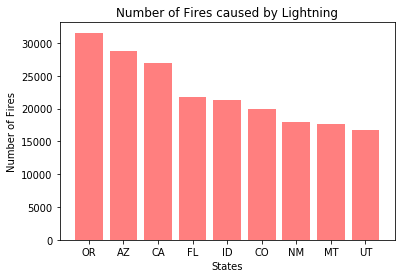

In [38]:
plt.bar(state_info["index"], state_info["Count"], color='r', alpha=0.5, align="center")
plt.title("Number of Fires caused by Lightning")
plt.xlabel("States")
plt.ylabel("Number of Fires")
plt.savefig("output_data_sam/lightning_counts.png")

In [39]:
acres_burned = (fires_pd.groupby(fires_pd["STAT_CAUSE_DESCR"]).sum()["FIRE_SIZE"]/100000)
acres_burned = pd.DataFrame({"Fire Size in Millions":acres_burned
                            })
acres_burned

,Fire Size in Millions
STAT_CAUSE_DESCR,
Arson,94.872742
Campfire,34.290615
Children,4.698303
Debris Burning,59.757927
Equipment Use,67.990464
Fireworks,3.182073
Lightning,870.335010
Miscellaneous,143.942042
Missing/Undefined,87.517255


In [40]:
top_causes_in_size = acres_burned["Fire Size in Millions"] > 60
acres_burned_df = acres_burned[top_causes_in_size].reset_index()

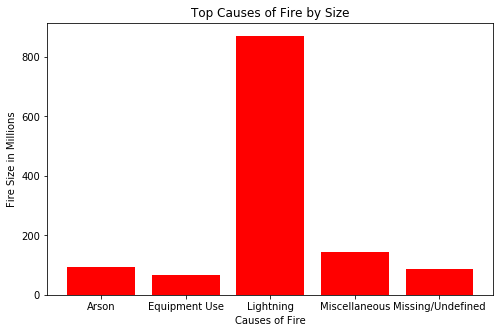

In [115]:
plt.figure(figsize=(8,5))
plt.bar(acres_burned_df["STAT_CAUSE_DESCR"], acres_burned_df["Fire Size in Millions"], color='r', alpha=1, align="center")
plt.title("Top Causes of Fire by Size")
plt.xlabel("Causes of Fire")
plt.ylabel("Fire Size in Millions")
plt.savefig("output_data_sam/fire_causes.png")
plt.show()

In [106]:
sorted_fires = fires_pd.sort_values(by=["FIRE_SIZE"],ascending = False)

In [120]:
biggest_fires = sorted_fires["FIRE_SIZE"] > 461045
biggest_df = fires_pd[biggest_fires].sort_values(by=["FIRE_SIZE"],ascending= False)
fire_years_biggest = biggest_df["FIRE_YEAR"]
fire_sizes_biggest = biggest_df["FIRE_SIZE"]
fire_cause_biggest = biggest_df["STAT_CAUSE_DESCR"]
fire_department_biggest = biggest_df["SOURCE_REPORTING_UNIT_NAME"]
fire_state_biggest = biggest_df["STATE"]
biggest_df = pd.DataFrame({
    "Year of Fire":fire_years_biggest,
    "Size of Fire by Acres":fire_sizes_biggest,
    "Fire Cause":fire_cause_biggest,
    "Fire Department": fire_department_biggest,
    "State":fire_state_biggest
})
biggest_df

/Users/samstruthers/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year of Fire,Size of Fire by Acres,Fire Cause,Fire Department,State
211296,1997,606945.0,Lightning,Alaska Fire Service,AK
1579574,2012,558198.3,Lightning,Vale District,OR
1459664,2011,538049.0,Campfire,Apache-Sitgreaves National Forest,AZ
305585,2004,537627.0,Lightning,Alaska Fire Service,AK
1215267,2009,517078.0,Lightning,Alaska Fire Service,AK
153705,2002,499945.0,Lightning,Siskiyou National Forest,OR
305684,2004,483280.0,Lightning,Alaska Fire Service,AK
352785,2006,479549.0,Missing/Undefined,Lake Meredith National Recreation Area,TX
305642,2004,463994.0,Lightning,Alaska Fire Service,AK
1578265,2012,461047.0,Lightning,Winnemucca Field Office,OR


In [122]:
large_fires_csv = "large_fires.csv"
large_fires_pd = pd.read_csv("large_fires.csv")
large_fires_pd.head(10)

,Year,Fire Name,Location,Size in Acres
0,2004,Taylor Complex,Alaska Division of Forestry - AK,"1,305,592"
1,2006,East Amarillo Complex,Texas Forest Service - TX,"907,245"
2,2007,Murphy Complex,BLM Twin Falls District - ID,"652,016"
3,2004,Eagle Complex,BLM Upper Yukon Zone - AK,"614,974"
4,1997,Inowak Fire,Alaska Division of Forestry - AK,"610,000"
5,2004,Solstice Complex,BLM Upper Yukon Zone - AK,"547,505"
6,2004,Boundary,Alaska Division of Forestry - AK,"537,098"
7,2002,Biscuit,Siskiyou National Forest - OR,"499,570"
8,2002,Rodeo/Chediski,BIA Fort Apache Agency - AZ,"468,638"
9,2004,Central Complex,BLM Upper Yukon Zone - AK,"451,162"
